In [1]:
from itertools import combinations

def zbiory_bazowe_dopuszczalne(A, b):
    n = A.ncols()  # wymiar przestrzeni
    m = A.nrows()  # liczba równań

    bazowe_dopuszczalne = []
    
    for Base in combinations(range(n), m):
        AB = A.matrix_from_columns(Base)
        if AB.det() != 0:
            if  all(i >= 0 for i in ~AB * b):
                bazowe_dopuszczalne.append(Base)

    return bazowe_dopuszczalne

In [2]:
def rozwiazanie_bazowe(A, b, Base):
    AB = A.matrix_from_columns(Base)
    if AB.det() == 0:
        return None
    
    n = A.ncols()  # wymiar przestrzeni

    wartosci_bazowe = ~AB * b
    rozwiazanie = [0] * n
    for i, bi in enumerate(Base):
        rozwiazanie[bi] = wartosci_bazowe[i]
    return rozwiazanie

In [3]:
# Dany problem w postaci macierzowej - przykład z pracy domowej

A = matrix(QQ, [[-4, 1], [-1, 2], [1, 1], [1, -1], [1, -6]])
b = vector(QQ, [1, 9, 12, 4, -6])

# Doprowadzamy problem do postaci równościowej
A = A.augment(identity_matrix(5))

# Wyznaczamy rozwiazania bazowe dopuszczalne
for Base in zbiory_bazowe_dopuszczalne(A, b):
    print(f'Zbiór bazowy {Base}, rozwiązanie bazowe {rozwiazanie_bazowe(A, b, Base)}')

Zbiór bazowy (0, 1, 2, 3, 4), rozwiązanie bazowe [6, 2, 23, 11, 4, 0, 0]
Zbiór bazowy (0, 1, 2, 3, 6), rozwiązanie bazowe [8, 4, 29, 9, 0, 0, 10]
Zbiór bazowy (0, 1, 2, 5, 6), rozwiązanie bazowe [5, 7, 14, 0, 0, 6, 31]
Zbiór bazowy (0, 1, 3, 4, 5), rozwiązanie bazowe [0, 1, 0, 7, 11, 5, 0]
Zbiór bazowy (0, 1, 4, 5, 6), rozwiązanie bazowe [1, 5, 0, 0, 6, 8, 23]
Zbiór bazowy (1, 2, 3, 4, 5), rozwiązanie bazowe [0, 1, 0, 7, 11, 5, 0]
Zbiór bazowy (1, 3, 4, 5, 6), rozwiązanie bazowe [0, 1, 0, 7, 11, 5, 0]


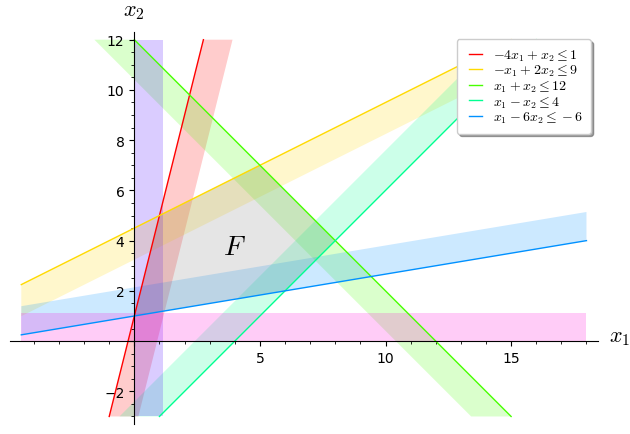

In [4]:
A = matrix(QQ, [[-4, 1], [-1, 2], [1, 1], [1, -1], [1, -6]])
P = InteractiveLPProblemStandardForm(A, b, [0, 0])
plot(P)